# Character Recognition using CNN (Part 1 of Task 2)

> Image Classification using convolution neural networks. Author: [Pratik Kumar](https://pr2tik1.github.io)

## 1. Importing Modules

To develop and train a convolution neural network architecture, I have used PyTorch framework. Along with this OpenCV, numpy, pandas and matplotlib for image data handling and plotting are used. In this section we will importing all necessary modules.  

In [1]:
import random
import copy
import time 
import pandas as pd 
from PIL import Image
import numpy as np
#from torchsummary import summary


import torch
import torchvision
import torch.optim as optim
import torch.utils.data as data
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [2]:
from utility import dataset, plot_loss, plot_images, Net, train_model, compute_accuracy, cal_accuracy

## 2. Data Preprocessing

The initial step is to create a dataframe of labels generated by carefully examining the dataset provided. This Labels.csv is mapped to image with its corresponding labels. This is necessary step for our model to understand classes. PyTorch also provides torchvision.data.ImageFolder() function to   

To change images into vector with normalisation and augmentation, following values are fetched to torchvision.transforms function. We perform: 
    
    - Random Rotations
    - Random Resizing and Cropping 
    - Change Image arrays to Tensor
    - Normalize

In [3]:
train_transforms = transforms.Compose([
                   transforms.RandomRotation(degrees=45),
                   transforms.RandomResizedCrop(64, scale=(0.9, 1.0), ratio=(0.9, 1.1)),
                   transforms.ToTensor(),
                   transforms.Normalize(mean = [0.5,0.5,0.5], std = [0.5,0.5,0.5])

               ])

Loading custom dataset that returns images and labels. 

In [4]:
#LABELS='data/labels.csv' 
ROOT = '../input/characters/train'

train_data = datasets.ImageFolder(root=ROOT, transform = train_transforms)

Splitting the dataset into training and validation dataset. This is needed to keep track of how our model performs.

In [5]:
VALID_RATIO = 0.70
n_train_examples = int(len(train_data) * VALID_RATIO)
n_valid_examples = len(train_data) - n_train_examples
train_data, valid_data = data.random_split(train_data,[n_train_examples, n_valid_examples])

valid_data = copy.deepcopy(valid_data)
valid_data.dataset.transform = train_transforms

The final number of training and validation dataset.

In [6]:
print(f'Number of training examples: {len(train_data)}')
print(f'Number of validation examples: {len(valid_data)}')

Number of training examples: 1736
Number of validation examples: 744


Further we take our tensor datasets and put fetch them into Dataloader with certain batches(BATCH_SIZE). 

In [7]:
BATCH_SIZE = 64
train_iterator = data.DataLoader(train_data,batch_size = BATCH_SIZE)
valid_iterator = data.DataLoader(valid_data,batch_size = BATCH_SIZE)

## 4. Hyper-parameters and model development

In this section setting device to cuda or cpu based upon availablity. Loading the model and setting hyper parameters for training. I have used Cross Entropy loss function which is suitable for multi-class classification tasks. The classes in our task is 10+26+26=62 classes, as we have digits, small letters and capital letters. The updation rule is Adam optimizer with learning rate of 1e-4.

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = Net(62)
model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
device

device(type='cuda')

Our model is inspired by AlexNet which was among the early CNNs that performed well in ImageNet Classification Challenge. This has 8 layers: 5 Convolution Layers and 3 Fully Connected Layers. The input to intital convolution layer is 64x64x3 image that are processed into arrays with values ranging from 0 to 1. Final output layer after series of convolution, pooling, and drop outs, yield predictions for the 62 classes.  

In [9]:
model

Net(
  (features): Sequential(
    (0): Conv2d(3, 227, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(227, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
   

## 5. Training the custom model Net()

Training the model on the character images dataset. This block trains the model and saves it as 'model.pt' in same directory. The train_model function returns lists of training and validation accuracies and as well as the losses. The total epochs are set to 60, taking care of underfitting and overfitting.  

In [10]:
train_loss_list, valid_loss_list, train_acc_list, valid_acc_list = train_model(model=model, #model from scratch 
                                             num_epochs=30,
                                             train_iterator=train_iterator,
                                             valid_iterator=valid_iterator, 
                                             optimizer=optimizer,
                                             criterion=criterion, 
                                             device=device,
                                             model_save =True,
                                             model_name='model.pt')

Epoch: 1 	Training Loss: 0.066629 	Validation Loss: 0.066621
Validation loss decreased (inf --> 0.066621).  Saving model ...
Epoch: 2 	Training Loss: 0.066576 	Validation Loss: 0.066638
Epoch: 3 	Training Loss: 0.066542 	Validation Loss: 0.066690
Epoch: 4 	Training Loss: 0.066146 	Validation Loss: 0.066097
Validation loss decreased (0.066621 --> 0.066097).  Saving model ...
Epoch: 5 	Training Loss: 0.065310 	Validation Loss: 0.064526
Validation loss decreased (0.066097 --> 0.064526).  Saving model ...
Epoch: 6 	Training Loss: 0.063441 	Validation Loss: 0.061685
Validation loss decreased (0.064526 --> 0.061685).  Saving model ...
Epoch: 7 	Training Loss: 0.061163 	Validation Loss: 0.060310
Validation loss decreased (0.061685 --> 0.060310).  Saving model ...
Epoch: 8 	Training Loss: 0.060394 	Validation Loss: 0.059422
Validation loss decreased (0.060310 --> 0.059422).  Saving model ...
Epoch: 9 	Training Loss: 0.059181 	Validation Loss: 0.057941
Validation loss decreased (0.059422 --> 0.

## 6. Plotting Loss and Accuracy of model

The lists from the above train_model function are visualized below.

### 6.1. Loss Curve

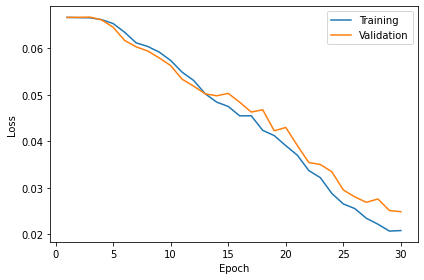

In [11]:
plot_loss(train_loss_list, valid_loss_list)

### 6.2. Accuracy Curve

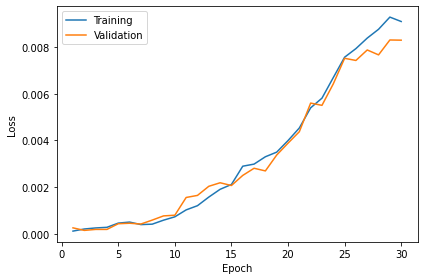

In [12]:
plot_loss(train_acc_list, valid_acc_list)

## 7. Calculate accuracy

The training and validation accuracy is calculated in this block to keep track of how oue model performs.

In [13]:
#Training Accuracy
cal_accuracy(train_iterator, model, device)

Got 1110 / 1736 with accuracy 63.94


In [14]:
#Validation Accuracy
cal_accuracy(valid_iterator, model, device)

Got 391 / 744 with accuracy 52.55


## Loading the model

In [15]:
model.load_state_dict(torch.load('./model.pt'))

<All keys matched successfully>

## Testing

In [16]:
test_data = datasets.ImageFolder(root='../input/testdata/test',transform = train_transforms)

In [17]:
test_loader = torch.utils.data.DataLoader(test_data, batch_size=256)

In [18]:
len(test_loader)

4

In [19]:
test_loss = 0.0
model.eval() 

for data, target in test_loader:
    data, target = data.to(device), target.to(device)
    output = model(data)
    loss = criterion(output, target)
    test_loss += loss.item()*data.size(0)
    _, pred = torch.max(output, 1)
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))

In [20]:
# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

Test Loss: 1.643673



In [21]:
#Validation Accuracy
cal_accuracy(test_loader, model, device)

Got 487 / 930 with accuracy 52.37


## Conclusion

The model performs well but has less accuracy of about 50-60%. This can be increased using augmentations and better hyperparameters.  

# Thank you!

Author : Pratik Kumar
- References: 

    - [AlexNet Paper](https://papers.nips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf)
    - [MNIST](http://yann.lecun.com/exdb/mnist/)
    - [PyTorch Tutorials](https://pytorch.org/tutorials/)